In [ ]:
# Postdam PM2.5 Ensemble Boosting  Forcasting 

* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [2]:
#pip install xgboost

In [3]:
#pip install catboost

In [4]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [5]:
# import src
import model_base as mb
import ensemble as en

## Data Exploration

* Load Data


In [6]:
df= mb.get_cleaned_datetime_df()
mb.set_start_date_time_index(df)
df.head()

,Start_Timestamp,End_Timestamp,End,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
Start,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,1356998400,1357002000,2013-01-01 01:00:00,6001,71.04,ug.m-3,1,1,5,88.96,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
2013-01-01 01:00:00,1357002000,1357005600,2013-01-01 02:00:00,6001,20.52,ug.m-3,1,1,5,25.17,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
2013-01-01 02:00:00,1357005600,1357009200,2013-01-01 03:00:00,6001,9.56,ug.m-3,1,1,5,11.97,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
2013-01-01 03:00:00,1357009200,1357012800,2013-01-01 04:00:00,6001,9.45,ug.m-3,1,1,5,11.73,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
2013-01-01 04:00:00,1357012800,1357016400,2013-01-01 05:00:00,6001,13.02,ug.m-3,1,1,5,15.88,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


## Splitting Data 

Train, Validation and Test data

In [7]:
train_data, validation_data, test_data = mb.split_data(df)
# Extract the features
X_train, X_val, X_test = mb.extract_features(train_data, validation_data, test_data)
# Extract the target variable
y_train, y_val, y_test = mb.extract_target(train_data, validation_data, test_data)

Training set size: 52588
Validation set size: 17529
Test set size: 17531


# Boosting


## Gradiend Boosting


Gradient Boosting is an ensemble machine learning algorithm that combines the predictions of sequentially trained weak learners, typically decision trees, to create a strong model. It corrects its predecessors' errors by focusing on challenging cases. Optimization is guided by gradient descent, adjusting each tree's contribution using a learning rate. It's effective for both regression and classification, offering high predictive accuracy and handling feature importance well. Popular variants like XGBoost, LightGBM, and CatBoost provide faster and more scalable implementations. Despite its strengths, Gradient Boosting can be computationally intensive and may overfit if not carefully regularized.

Training set size: 52588
Validation set size: 17529
Test set size: 17531
[10.16448883  8.27555366  7.59540006 ...  6.35580766  6.03163194
  5.89936876]
MAE: 1.7436
MSE: 8.4828
RMSE: 2.9125
MAPE: 0.2454
MASE: 1.6822337666677722
[6.37462732 6.55155096 5.97026569 ... 7.15592554 6.94614214 8.89910747]
MAE: 1.9488
MSE: 8.0315
RMSE: 2.8340
MAPE: 0.2657
MASE: 1.804203624569279


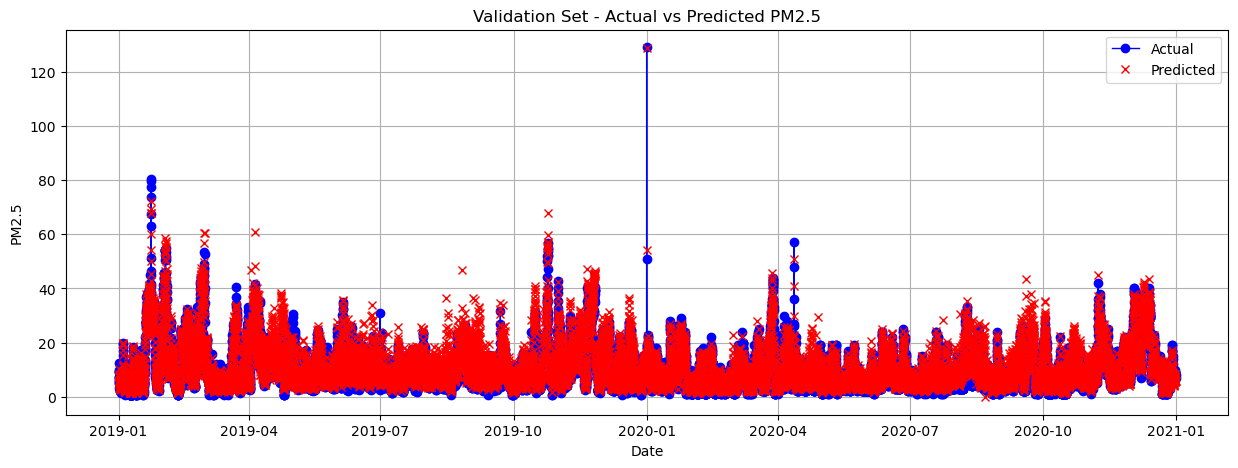

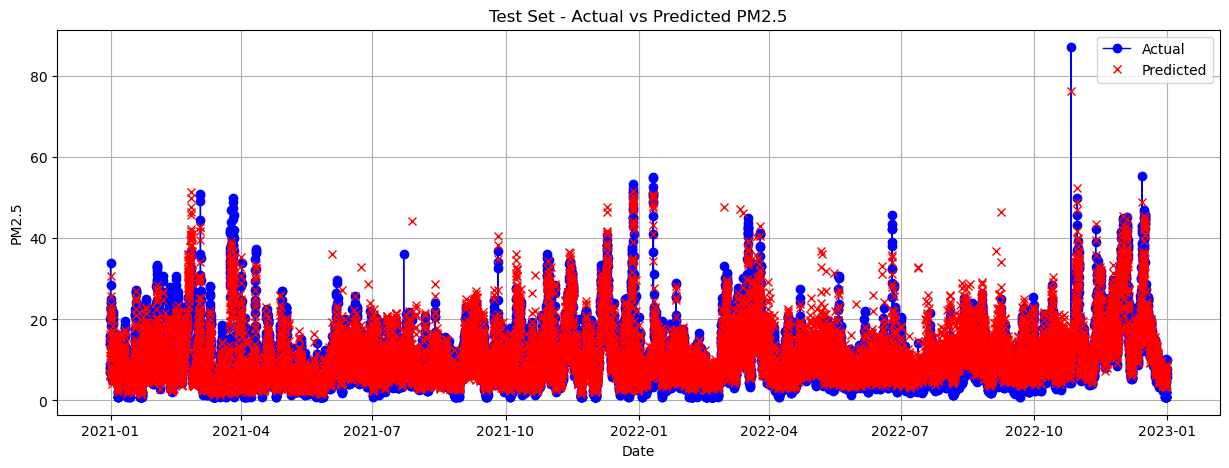

In [8]:
en.train_and_evolve(df, 'gradient_boosting')

## Ada Boosting


Training set size: 52588
Validation set size: 17529
Test set size: 17531
[8.72796748 8.09055556 7.5484984  ... 6.89853526 6.22445293 6.33688345]
MAE: 1.6339
MSE: 7.4448
RMSE: 2.7285
MAPE: 0.2181
MASE: 1.5764377838123314
[6.92368071 6.8844089  6.33688345 ... 7.05532819 6.81845209 9.26669773]
MAE: 1.8352
MSE: 7.2361
RMSE: 2.6900
MAPE: 0.2275
MASE: 1.6990878548055368


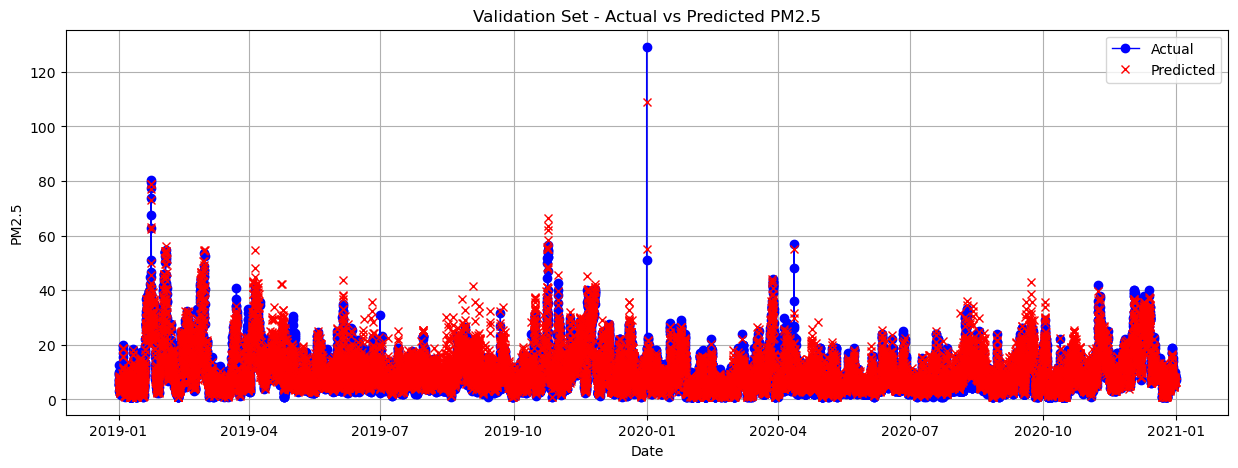

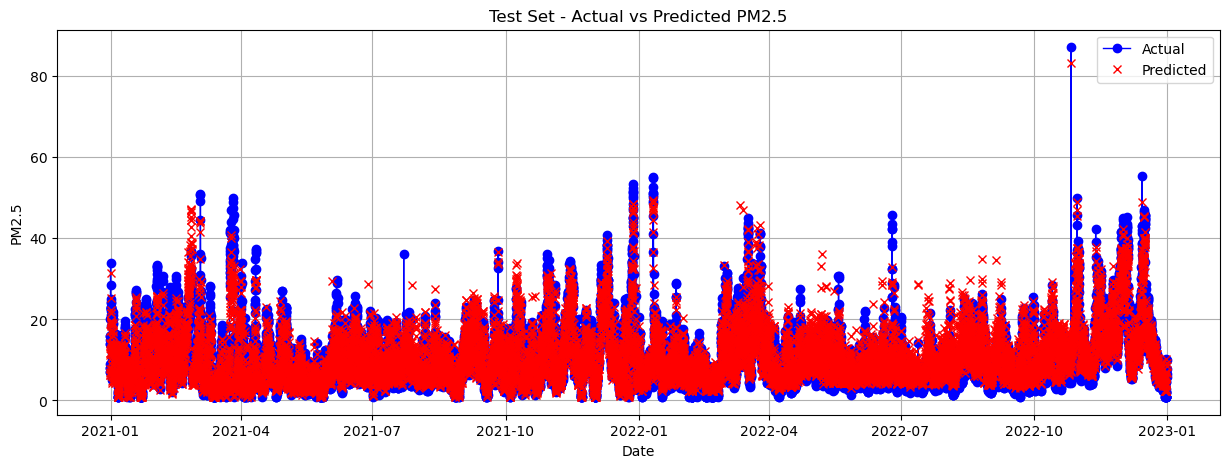

In [9]:
en.train_and_evolve(df, 'adaboost')

## Histogram Gradient Boosting


Training set size: 52588
Validation set size: 17529
Test set size: 17531
[9.16605719 7.8326394  7.53138249 ... 6.56693593 6.95539036 6.27398939]
MAE: 1.7168
MSE: 8.4372
RMSE: 2.9047
MAPE: 0.2461
MASE: 1.6563557289567628
[7.15264062 6.68189687 6.23954469 ... 6.84265516 6.65653916 8.87185455]
MAE: 1.9011
MSE: 7.6788
RMSE: 2.7711
MAPE: 0.2644
MASE: 1.7600862161213853


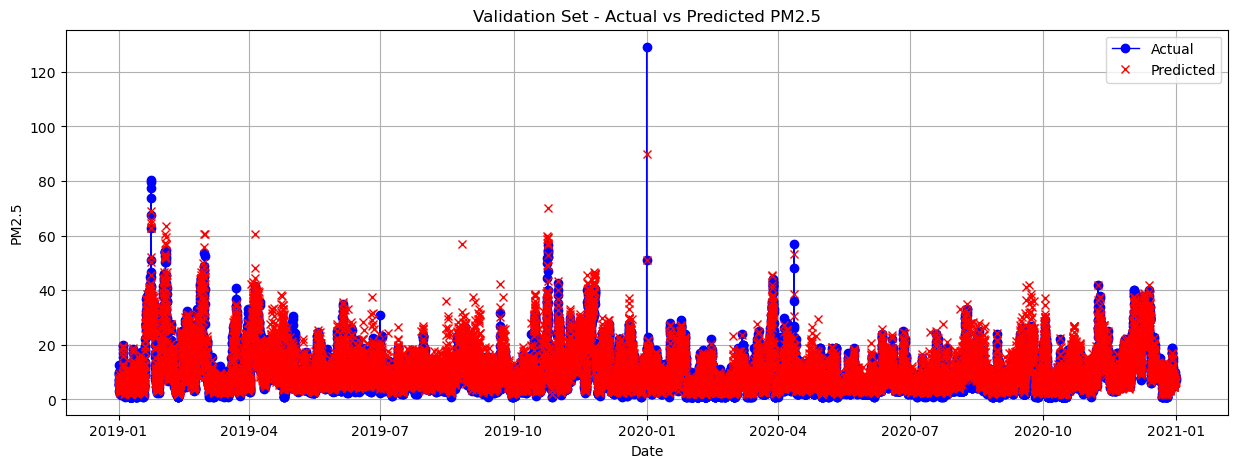

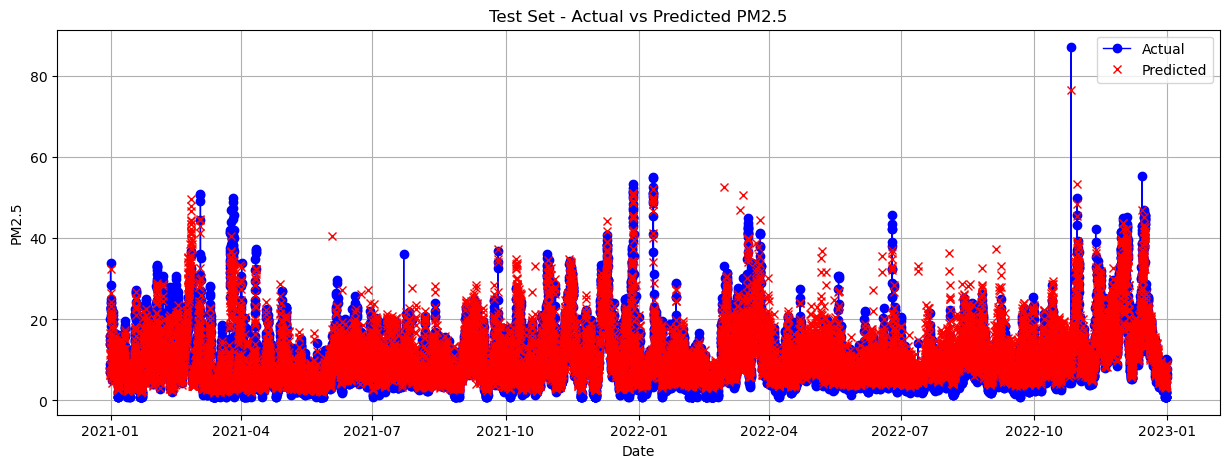

In [10]:
en.train_and_evolve(df, 'histogram_gradient_boosting')

## Xgboost

Training set size: 52588
Validation set size: 17529
Test set size: 17531
[8.599253  7.83731   7.362186  ... 6.83973   8.095768  7.4085603]
MAE: 1.7442
MSE: 8.9863
RMSE: 2.9977
MAPE: 0.2393
MASE: 1.6828515864596874
[ 7.123715   6.621556   6.163173  ...  7.140265   6.5322747 12.431608 ]
MAE: 1.9434
MSE: 8.3992
RMSE: 2.8981
MAPE: 0.2562
MASE: 1.7992111105129958


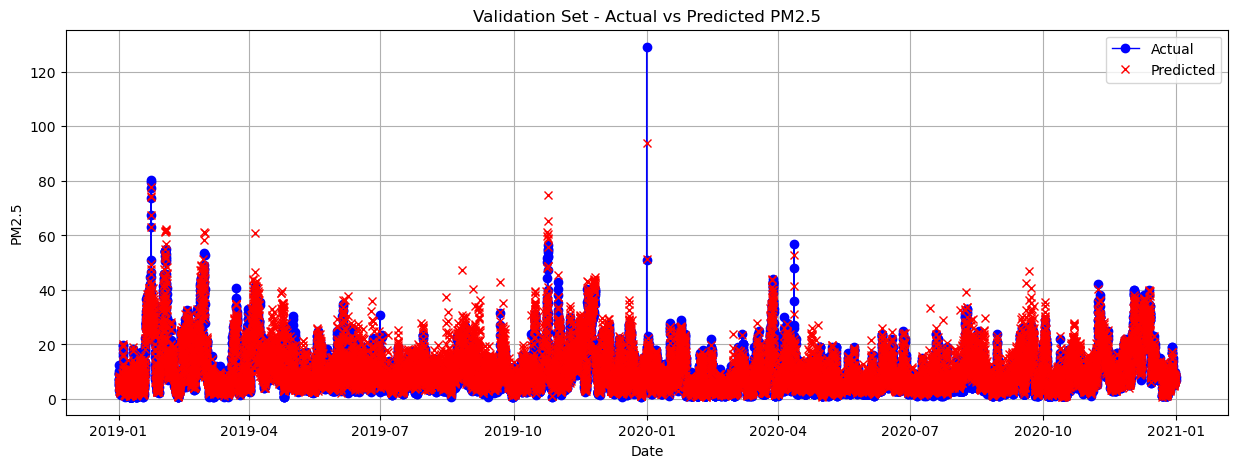

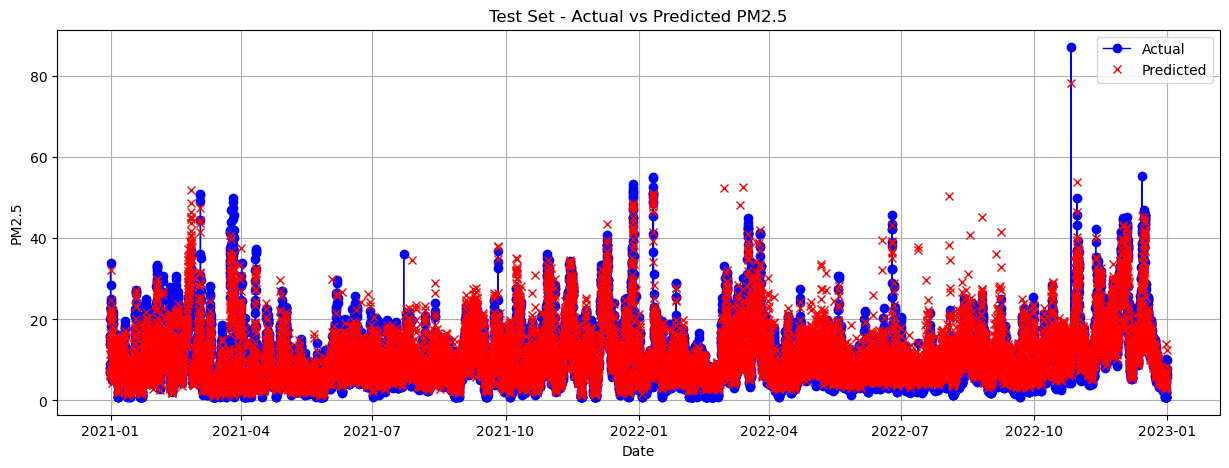

In [11]:
en.train_and_evolve(df, 'xgboost')

## CatBoost

Training set size: 52588
Validation set size: 17529
Test set size: 17531
0:	learn: 10.3820969	total: 50.6ms	remaining: 10.1s
1:	learn: 9.6145983	total: 53.8ms	remaining: 5.33s
2:	learn: 8.9241913	total: 56.5ms	remaining: 3.71s
3:	learn: 8.3246541	total: 59.4ms	remaining: 2.91s
4:	learn: 7.7838157	total: 62ms	remaining: 2.42s
5:	learn: 7.3071027	total: 64.7ms	remaining: 2.09s
6:	learn: 6.8752211	total: 67.3ms	remaining: 1.86s
7:	learn: 6.4935056	total: 70ms	remaining: 1.68s
8:	learn: 6.1592734	total: 72.7ms	remaining: 1.54s
9:	learn: 5.8638016	total: 75.2ms	remaining: 1.43s
10:	learn: 5.5876644	total: 77.9ms	remaining: 1.34s
11:	learn: 5.3570792	total: 80.6ms	remaining: 1.26s
12:	learn: 5.1461488	total: 83.3ms	remaining: 1.2s
13:	learn: 4.9510337	total: 86ms	remaining: 1.14s
14:	learn: 4.7926652	total: 88.7ms	remaining: 1.09s
15:	learn: 4.6541262	total: 91.3ms	remaining: 1.05s
16:	learn: 4.5259667	total: 93.9ms	remaining: 1.01s
17:	learn: 4.4140908	total: 96.7ms	remaining: 978ms
18:	lea

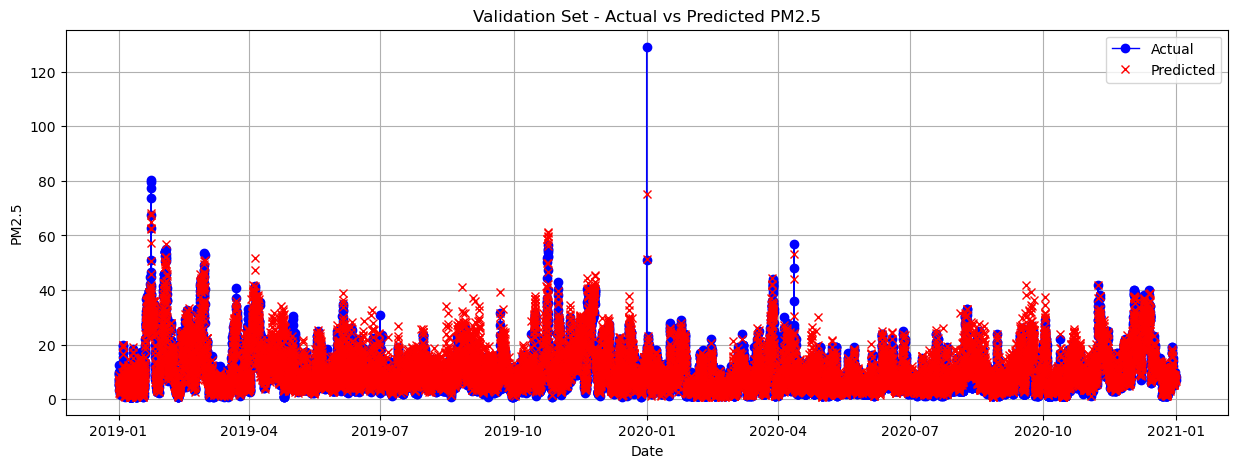

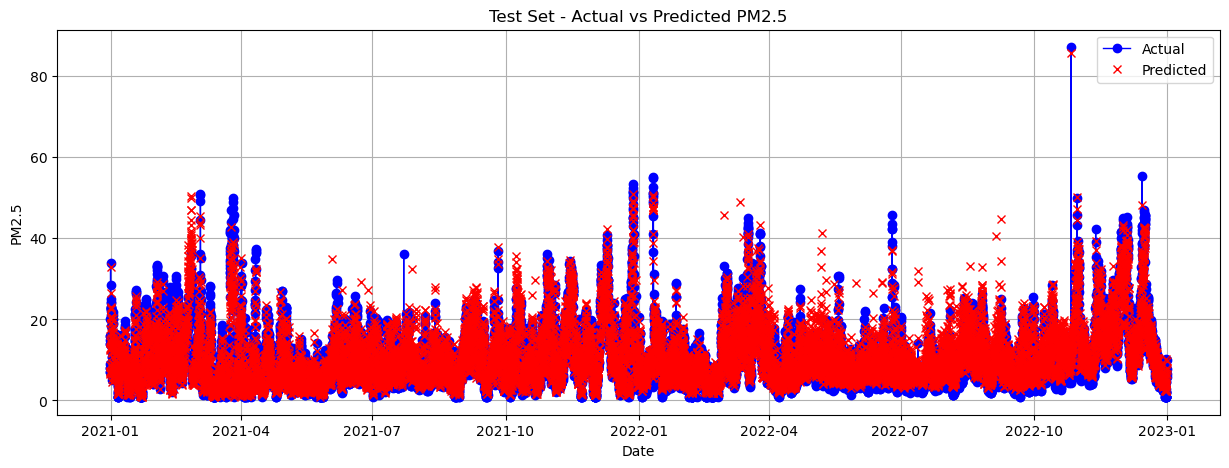

In [12]:
en.train_and_evolve(df,'catboost')

# Bagging

## Random Forest

Training set size: 52588
Validation set size: 17529
Test set size: 17531
[7.68673684 6.95746435 6.24741396 ... 7.21612507 6.63142777 6.903478  ]
MAE: 1.7072
MSE: 8.2628
RMSE: 2.8745
MAPE: 0.2272
MASE: 1.6471171684585377
[7.31878674 6.78359097 6.19430965 ... 7.18711242 7.28835255 8.99185832]
MAE: 1.8083
MSE: 7.2409
RMSE: 2.6909
MAPE: 0.2276
MASE: 1.6741152814387983


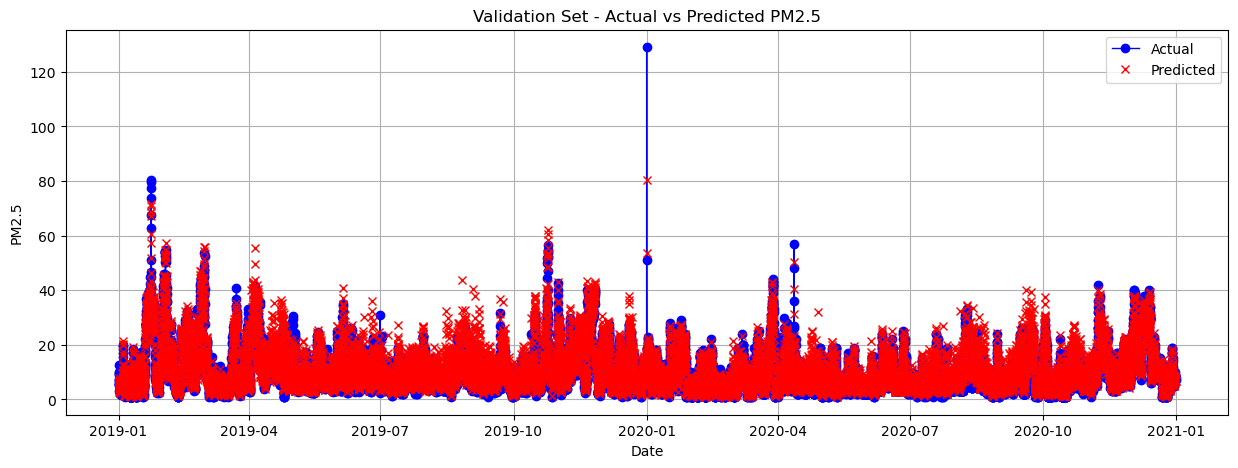

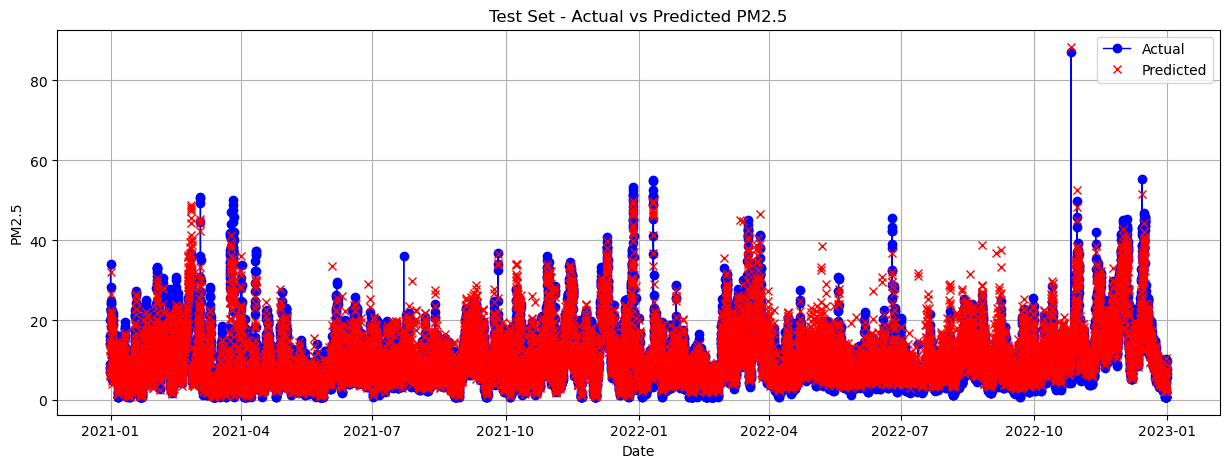

In [13]:
en.train_and_evolve_bagging(df)

# HyperPramater Tuning


In [14]:
best_gb_estimater_model = en.tune_and_evaluate(df, 'gradient_boosting')

Training set size: 52588
Validation set size: 17529
Test set size: 17531
Started 2023-11-28 00:31:24
Fitted 2023-11-28 00:31:24
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for gradient_boosting : {'gbr__learning_rate': 0.1, 'gbr__max_depth': 3, 'gbr__min_samples_leaf': 3, 'gbr__min_samples_split': 6, 'gbr__n_estimators': 406, 'pca__n_components': 0.95}
Best score gradient_boosting : 14.003270001404644
Prediction started  2023-11-28 00:49:14
MAE: 1.7436
MSE: 8.4828
RMSE: 2.9125
MAPE: 0.2454
MASE: 1.682233766667772
MAE: 1.9488
MSE: 8.0315
RMSE: 2.8340
MAPE: 0.2657
MASE: 1.804203624569279
Finished 2023-11-28 00:49:14


In [15]:
best_ada_gb_estimater_model = en.tune_and_evaluate(df, 'adaboost')

Training set size: 52588
Validation set size: 17529
Test set size: 17531
Started 2023-11-28 00:49:14
Fitted 2023-11-28 00:49:14
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for adaboost : {'adaboost__base_estimator__max_depth': 8, 'adaboost__learning_rate': 0.16297508346206444, 'adaboost__n_estimators': 70}
Best score adaboost : 14.042594775205393
Prediction started  2023-11-28 00:58:23
MAE: 1.6290
MSE: 7.3968
RMSE: 2.7197
MAPE: 0.2182
MASE: 1.5717068498300584
MAE: 1.8361
MSE: 7.2305
RMSE: 2.6890
MAPE: 0.2279
MASE: 1.6998654436800493
Finished 2023-11-28 00:58:23


In [18]:
best_hist_gb_estimater_model = en.tune_and_evaluate(df, 'histogram_gradient_boosting')

Training set size: 52588
Validation set size: 17529
Test set size: 17531
Started 2023-11-28 01:06:54
Fitted 2023-11-28 01:06:54
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for histogram_gradient_boosting : {'hist_gbr__learning_rate': 0.04410482473745831, 'hist_gbr__max_depth': 9, 'hist_gbr__max_iter': 373, 'hist_gbr__min_samples_leaf': 23, 'pca__n_components': 0.95}
Best score histogram_gradient_boosting : 14.476773614676185
Prediction started  2023-11-28 01:08:11
MAE: 1.7141
MSE: 8.5390
RMSE: 2.9222
MAPE: 0.2397
MASE: 1.653785839537735
MAE: 1.8529
MSE: 7.5805
RMSE: 2.7533
MAPE: 0.2417
MASE: 1.7154243825443727
Finished 2023-11-28 01:08:11


In [20]:
best_xgb_estimater_model = en.tune_and_evaluate(df, 'xgboost')

In [19]:
best_randomforest_estimater_model = en.tune_and_evaluate(df, 'randomforest')

Training set size: 52588
Validation set size: 17529
Test set size: 17531
Started 2023-11-28 01:08:36
Fitted 2023-11-28 01:08:36
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for randomforest : {'max_depth': 21, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 266}
Best score randomforest : 13.336912921046656
Prediction started  2023-11-28 01:31:17
MAE: 1.7089
MSE: 8.2308
RMSE: 2.8689
MAPE: 0.2276
MASE: 1.6488046710896191
MAE: 1.8083
MSE: 7.2406
RMSE: 2.6908
MAPE: 0.2272
MASE: 1.674136028369706
Finished 2023-11-28 01:31:18


In [21]:
best_catboost_estimater_model = en.tune_and_evaluate(df, 'catboost')

Training set size: 52588
Validation set size: 17529
Test set size: 17531
Started 2023-11-28 01:34:23
Fitted 2023-11-28 01:34:23
Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 9.9778917	total: 10.8ms	remaining: 2.15s
1:	learn: 9.2135249	total: 18.1ms	remaining: 1.79s
2:	learn: 8.5271053	total: 25.2ms	remaining: 1.66s
3:	learn: 7.9275596	total: 32.2ms	remaining: 1.58s
4:	learn: 7.4016393	total: 38.8ms	remaining: 1.51s
5:	learn: 6.9449917	total: 45.2ms	remaining: 1.46s
6:	learn: 6.4987290	total: 51.8ms	remaining: 1.43s
7:	learn: 6.1104704	total: 58.4ms	remaining: 1.4s
8:	learn: 5.7724395	total: 64.9ms	remaining: 1.38s
9:	learn: 5.4408862	total: 71.4ms	remaining: 1.36s
10:	learn: 5.1716001	total: 77.9ms	remaining: 1.34s
11:	learn: 4.9313772	total: 87.3ms	remaining: 1.37s
12:	learn: 4.7105008	total: 95.6ms	remaining: 1.38s
13:	learn: 4.5259631	total: 102ms	remaining: 1.36s
14:	learn: 4.3640290	total: 109ms	remaining: 1.34s
15:	learn: 4.2197488	total: 116ms	remaining: